## Boston Housing Dataset

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target


/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

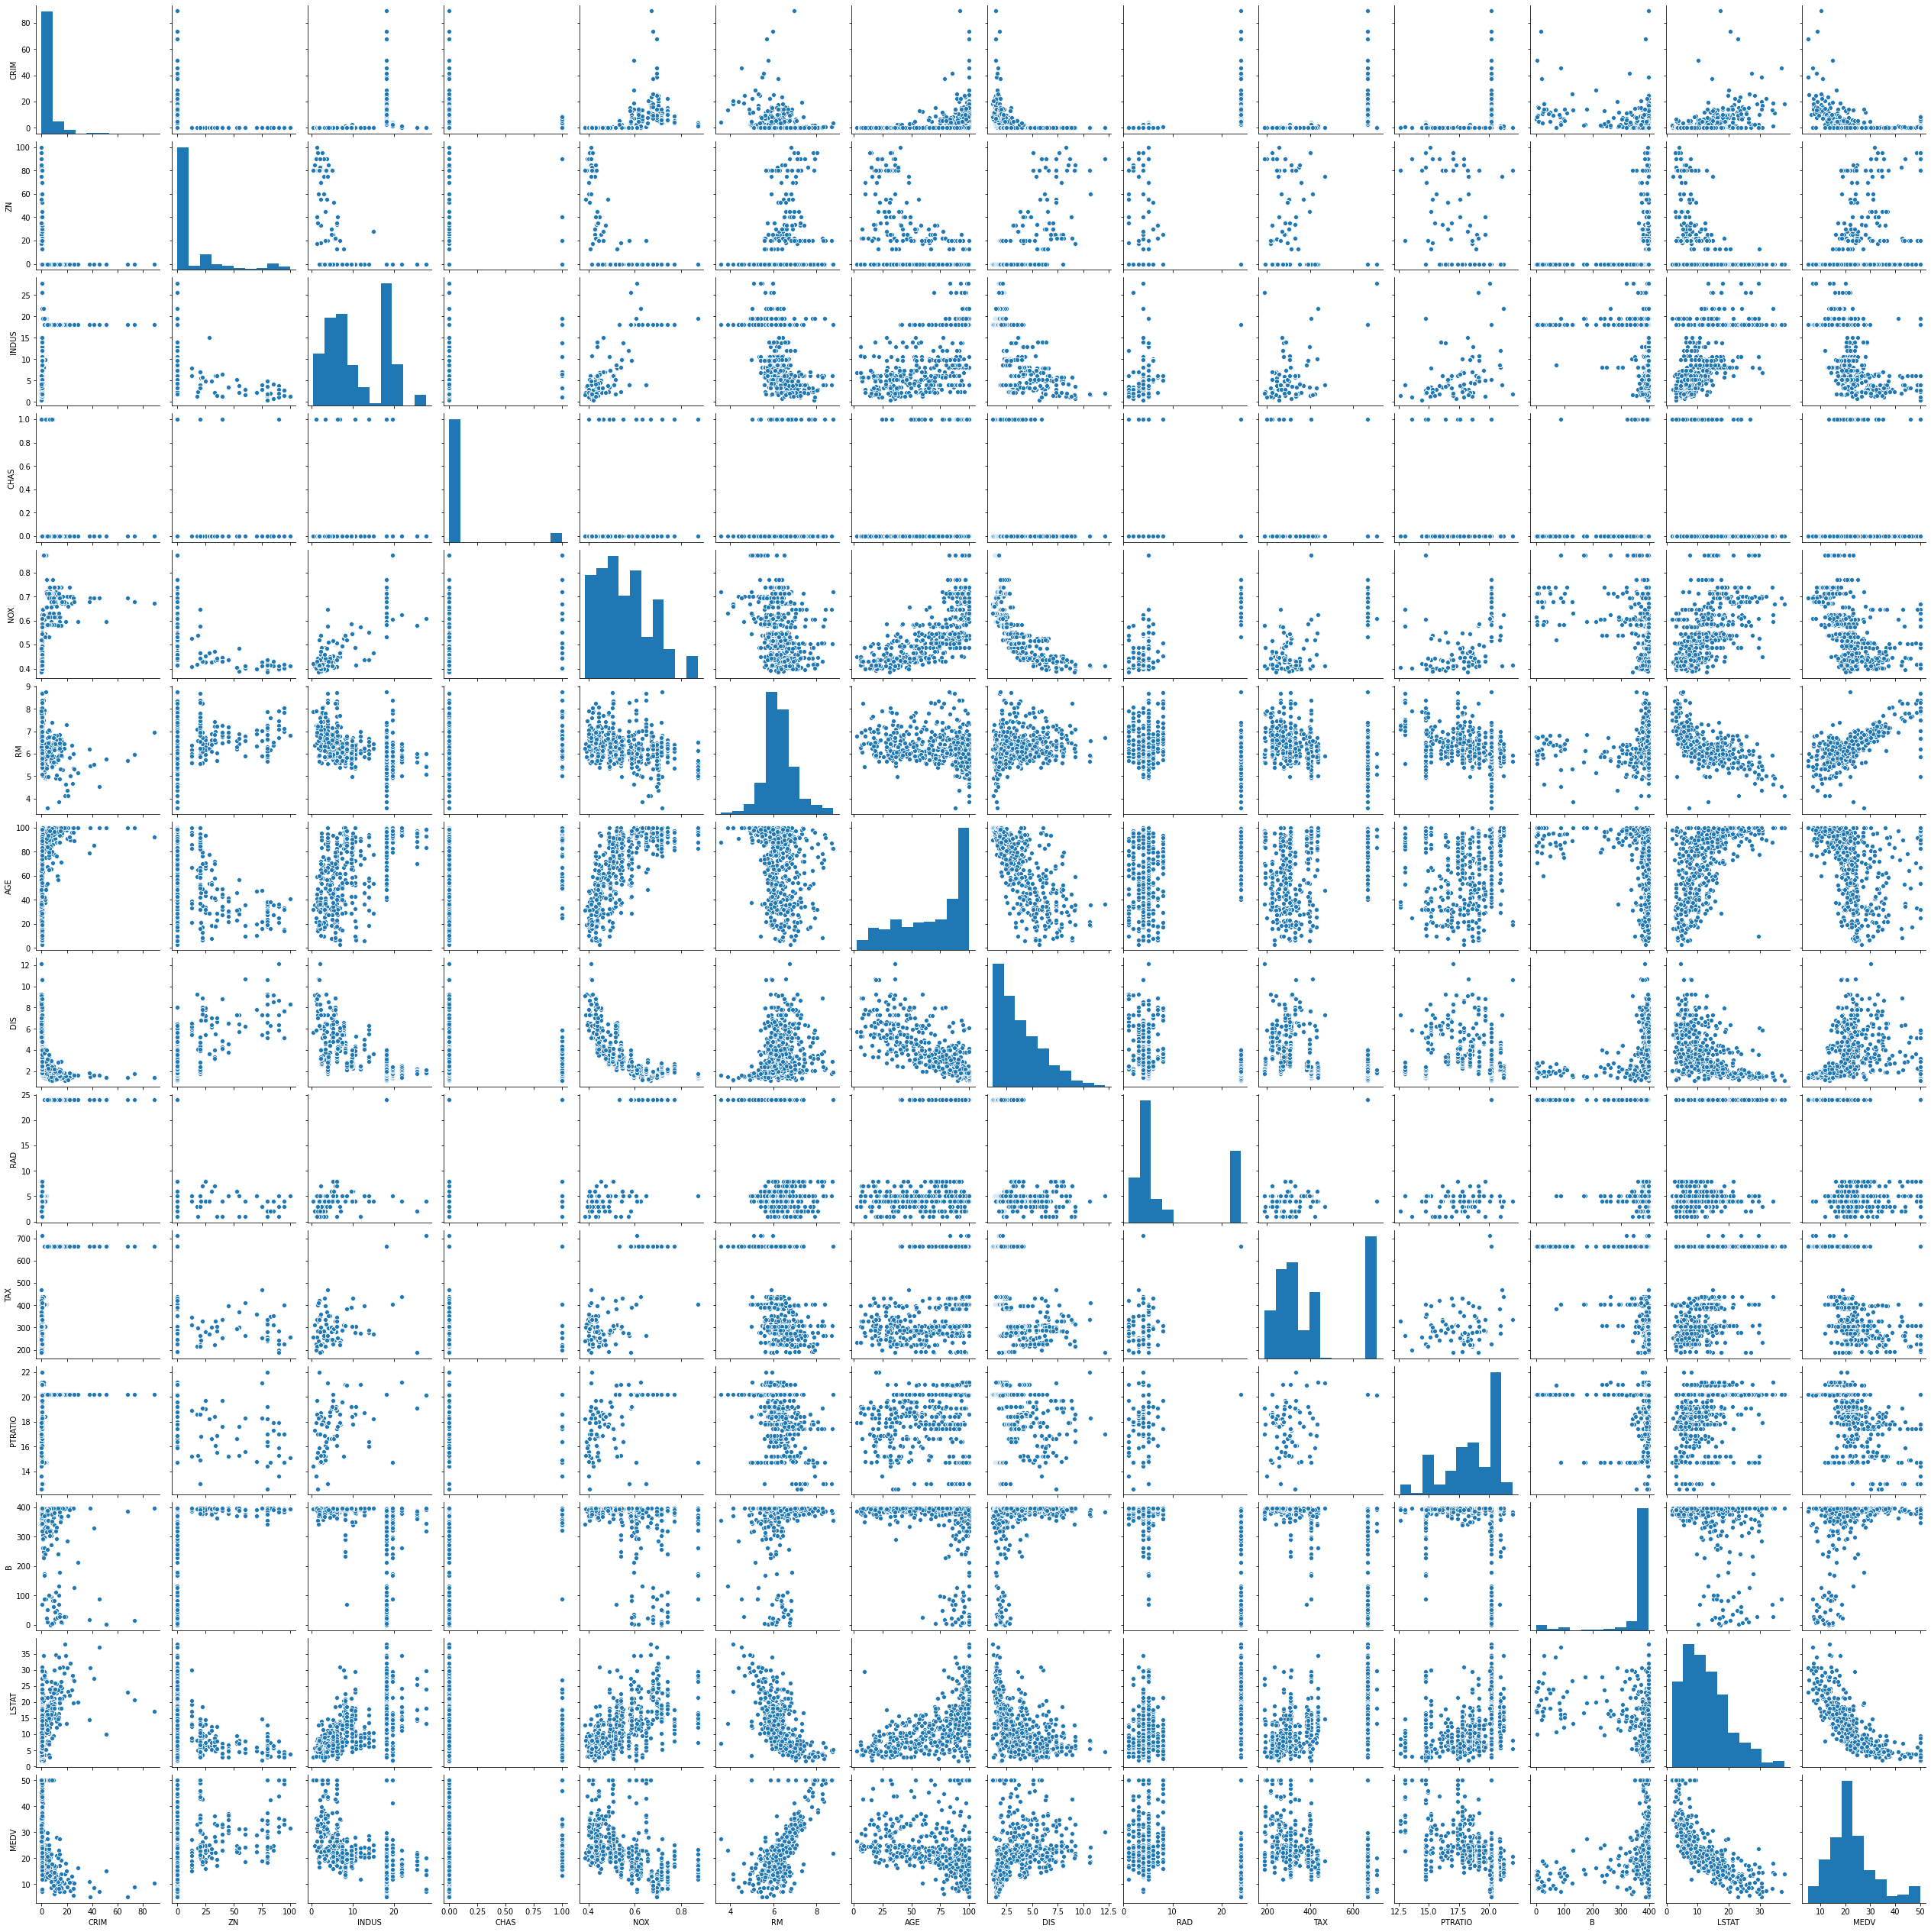

In [3]:
sns.pairplot(df)

## Let's do a very basic Regression with all the features and no form of scaling.

In [4]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [5]:
x = df.drop(['MEDV'], axis=1)
y = df[['MEDV']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

<IPython.core.display.Javascript object>

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [8]:
reg = lr.fit(x_train, y_train)

In [9]:
reg.score(x_train, y_train)

0.7559380876016175

In [10]:
reg.score(x_test, y_test)

0.6592466510354089

In [11]:
y_pred1 = lr.predict(x_test)

In [12]:
Result1 = r2_score(y_test, y_pred1)
Result1

0.6592466510354089

### Let's try a RIDGE regression if it helps.

In [13]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=5)
ridgereg = ridge.fit(x_train, y_train)

ridgereg.score(x_train, y_train)


0.7502729148909232

In [14]:
ridgereg.score(x_test, y_test)

0.6413839447113932

In [15]:
pp = ridge.predict(x_test)

In [16]:
rr = r2_score(y_test, pp)
rr

0.6413839447113932

## Now, let's do a regression with all features and Min-Max Scaler (Normalization)

In [17]:
#create an object for MinMax Scaler
mms = MinMaxScaler()

In [18]:
#fit the object on the training set
mms.fit(x_train)

MinMaxScaler()

In [19]:
#now trasnform x_train and x_test using the fitted object
x_train_scaled = mms.transform(x_train)
x_test_scaled = mms.transform(x_test)

In [20]:
#now let's fit the Linear Regression Model
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [21]:
#now predict on x_test_scaled using the same fitted function
y_pred2 = lr.predict(x_test_scaled)

In [22]:
#check the performance of the model
Result2 = r2_score(y_test, y_pred2)
Result2

0.6592466510354094

In [24]:
residual2 = y_test - y_pred2
residual2.head()

,MEDV
410,-1.003300
85,-1.194474
280,6.132305
422,2.473864
199,4.445125


<AxesSubplot:>

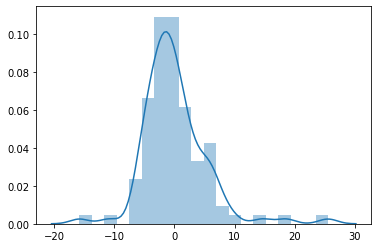

In [25]:
sns.distplot(residual2)

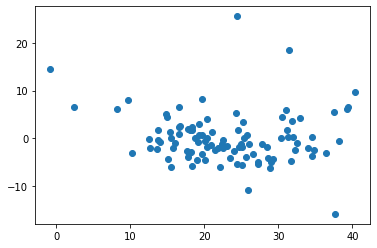

In [268]:
plt.scatter(y_pred2, residual2)

### We can see that, Normalizing did not improve the performance of the model.

## Now, let's do a regression with all features and Standard Scaler (Standardization)

In [26]:
ss = StandardScaler()
ss.fit(x_train)
x_train_stand = ss.transform(x_train)
x_test_stand = ss.transform(x_test)

lr.fit(x_train_stand, y_train)
y_pred3 = lr.predict(x_test_stand)
Result3 = r2_score(y_test, y_pred3)
Result3


0.6592466510354096

### We can see that, Standardizing did not improve the performance of the model.

# One way you can improve the prediction score is by selecting features.

<AxesSubplot:>

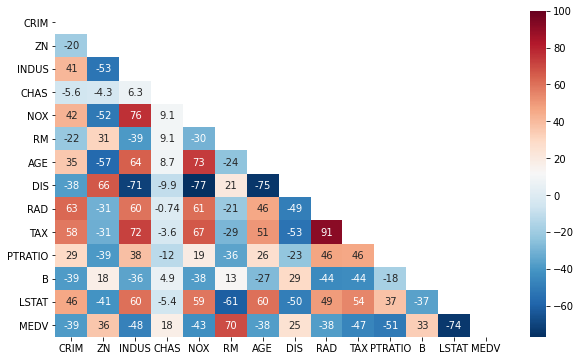

In [27]:
#We will select features which have amximum correlation with the target ('MEDV') feature. 
#to do that let' plot a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()*100, cmap='RdBu_r',annot=True, mask=np.triu(df.corr()))

#### Only 'RM' and 'LSTAT' have higher correlation with the target variable. We'll only use those. 
Another thing to notice is the correlation between 'RAD' and 'TAX' (i.e. 91%), this leads to Multi-collinearity. Therefore, such independant variables should not be selected together for training the model. 

In [28]:
x = df.drop(['MEDV'], axis=1)
y = df[['MEDV']]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

<IPython.core.display.Javascript object>

In [30]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred4 = lm.predict(x_test)
Result4 = r2_score(y_test, y_pred4)
Result4

0.6592466510354089

In [31]:
residual = y_test - y_pred4
residual.head()

,MEDV
410,-1.003300
85,-1.194474
280,6.132305
422,2.473864
199,4.445125


# let's check all the assumptions

## Multicolinearity with Variance Inflation Factor (VIF)
VIF ranges from 1 to infinity

VIF = 1, no correlation between the independent variables

VIF > 5 or 10 indicates high multicollinearity between one independent variable and others

In [32]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif


,Features,VIF
0,CRIM,2.011249
1,ZN,2.715270
2,INDUS,13.855845
3,CHAS,1.125462
4,NOX,71.197218
5,RM,72.274410
6,AGE,21.888834
7,DIS,14.224015
8,RAD,14.281682
9,TAX,57.770094


Start by dropping the variable, with the the largest VIF value because its trend is highly captured by other variables and observe the VIF values drop for other variables.

In [33]:
x = df.drop(['MEDV'], axis=1)

In [34]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [39]:
x = x.drop(['INDUS'], axis=1)

In [40]:
x.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

<IPython.core.display.Javascript object>

In [43]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred4 = lm.predict(x_test)
Result4 = r2_score(y_test, y_pred4)
Result4

0.66277259766793

# Normality of Residuals

<AxesSubplot:>

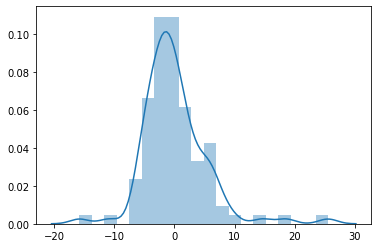

In [44]:
sns.distplot(residual)

In [45]:
np.mean(residual)

MEDV    0.087751
dtype: float64

# Homoscedesticity (constant variance)

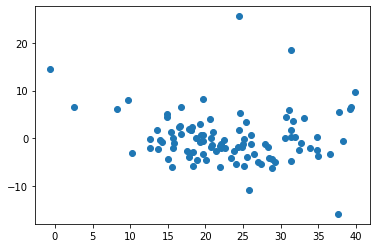

In [46]:
plt.scatter(y_pred4, residual)

The residuals are spread around the mean 0 and therefore there is constant varaiation in the residuals. Which is good.

In [49]:
r = df[['RM','LSTAT','PTRATIO']]
t = df[['MEDV']]

In [50]:
vif = pd.DataFrame()
vif["Features"] = r.columns
vif["VIF"] = [variance_inflation_factor(r.values, i) for i in range(r.shape[1])]
vif

,Features,VIF
0,RM,36.068093
1,LSTAT,5.855408
2,PTRATIO,51.797351


In [51]:
x_train, x_test, y_train, y_test = train_test_split(r,t, test_size=0.2, random_state = 123)

<IPython.core.display.Javascript object>

In [244]:
lrmodel = LinearRegression()
lrmodel.fit(x_train,y_train)
y_pred5 = lrmodel.predict(x_test)
Result5 = r2_score(y_test, y_pred5)
Result5

0.5512066826132233

## Other experiments

Text(0.5, 1.0, "'MEDV' feature distribution")

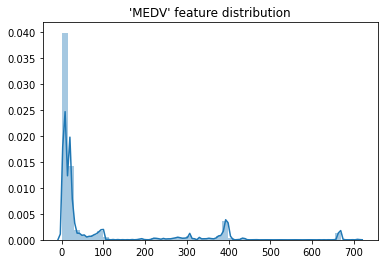

In [53]:
sns.distplot(df).set_title("'MEDV' feature distribution")

In [ ]:
df.isnull().sum()

#### Fit the scaler using available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values.This is done by calling the fit() function.


#### Apply the scale to training data. This means you can use the normalized data to train your model. This is done by calling the transform() function.

The default scale for the MinMaxScaler is to rescale variables into the range [0,1], although a preferred scale can be specified via the “feature_range” argument and specify a tuple, including the min and the max for all variables.

In [55]:
mmc = MinMaxScaler()
dfn = pd.DataFrame(mmc.fit_transform(df))

In [89]:
#dfn = pd.DataFrame(mmc.transform(df2))

In [56]:
dfn.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,0.389618
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,0.267222
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,0.360000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'After Z-Score Normalization')

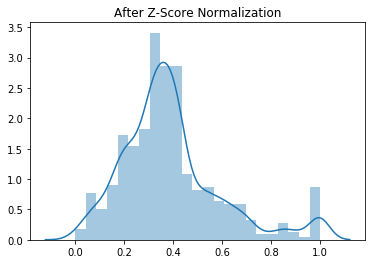

In [97]:
sns.distplot(dfn).set_title('After Min-Max Normalization')

In [92]:
ssc = StandardScaler()
dfs = pd.DataFrame(ssc.fit_transform(df2))

In [93]:
dfs.describe().round(2)

,0
count,506.00
mean,-0.00
std,1.00
min,-1.91
25%,-0.60
50%,-0.15
75%,0.27
max,2.99


Text(0.5, 1.0, 'After Z-Score Normalization')

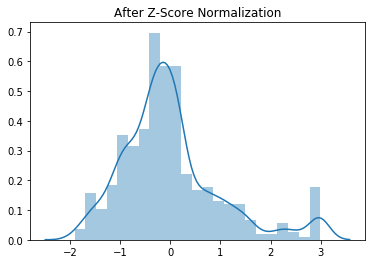

In [98]:
sns.distplot(dfs).set_title('After Z-Score Normalization')

AxesSubplot(0.125,0.125;0.775x0.755)


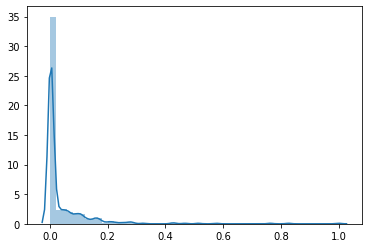

In [69]:
print(sns.distplot(dfn))

Text(0.5, 1.0, 'After Z-Score Normalization')

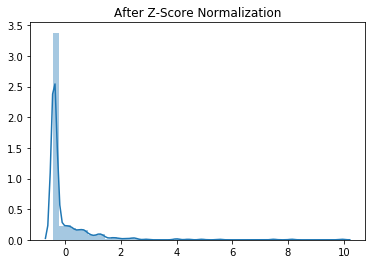

In [82]:
sns.distplot(dfs).set_title('After Z-Score Normalization')

In [16]:
df2.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [17]:
dfs.describe().round(2)

,0
count,506.00
mean,-0.00
std,1.00
min,-1.91
25%,-0.60
50%,-0.15
75%,0.27
max,2.99


In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


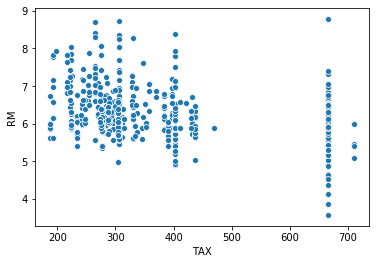

In [19]:
sns.scatterplot(x='TAX', y='RM', data=df)

In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
dfnew = df[['TAX','RM']]

In [22]:
dfnew

,TAX,RM
0,296.0,6.575
1,242.0,6.421
2,242.0,7.185
3,222.0,6.998
4,222.0,7.147
...,...,...
501,273.0,6.593
502,273.0,6.120
503,273.0,6.976
504,273.0,6.794


In [23]:
ssc.fit(dfnew)
dfnews = pd.DataFrame(ssc.transform(dfnew))

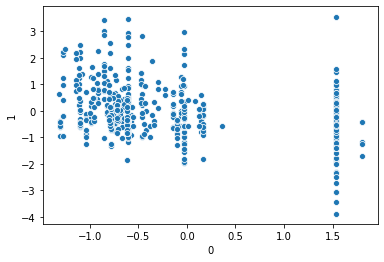

In [24]:
sns.scatterplot(x=0 ,y=1, data=dfnews)

In [25]:
mmc.fit(dfnew)
dfnewm = pd.DataFrame(mmc.transform(dfnew))

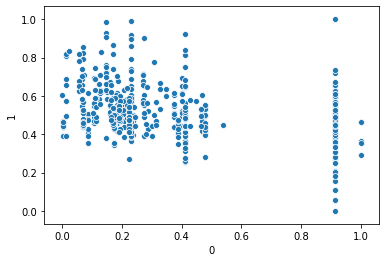

In [26]:
sns.scatterplot(x=0 ,y=1, data=dfnewm)

In [27]:
dfnewm.describe()

,0,1
count,506.000000,506.000000
mean,0.422208,0.521869
std,0.321636,0.134627
min,0.000000,0.000000
25%,0.175573,0.445392
50%,0.272901,0.507281
75%,0.914122,0.586798
max,1.000000,1.000000


In [29]:
dfnews.describe().round(2)

,0,1
count,506.00,506.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.31,-3.88
25%,-0.77,-0.57
50%,-0.46,-0.11
75%,1.53,0.48
max,1.80,3.56


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


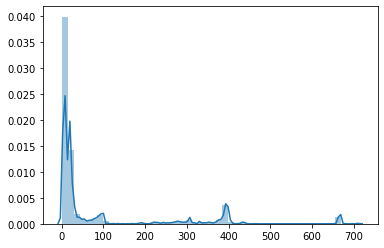

In [31]:
sns.distplot(df)

In [99]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

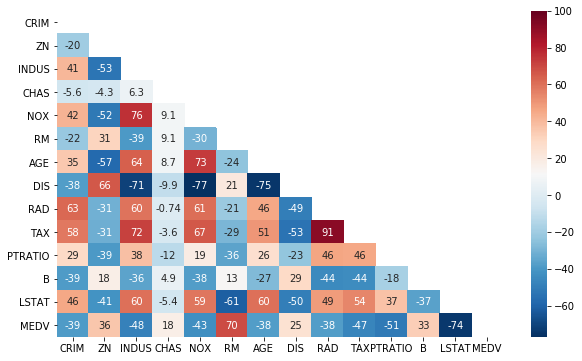

In [106]:
# Increase the figsize to 10x6
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()*100, cmap='RdBu_r',annot=True, mask=np.triu(df.corr()))

In [112]:
#let's just keep variables which have higher correlation
variables = df[['INDUS','RM','TAX','PTRATIO','LSTAT']]
target = df[['MEDV']]

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Import performance matrices for evaluating models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [116]:
#Split the dataset
variables_train, variables_test, target_train, target_test = train_test_split(variables, target, test_size=0.2, random_state=1234)

In [118]:
#We can confirm we have the right number of observations in each subset by
print( len(variables_train), len(variables_test), len(target_train), len(target_test) )

404 102 404 102


In [119]:
lr = LinearRegression()
model_lr = lr.fit(variables_train, target_train)

In [120]:
lr_pred=model_lr.predict(variables_test)

In [123]:
print( 'Results with all the features:')
print( 'R^2:', r2_score(target_test, lr_pred ))
print( 'MAE:', mean_absolute_error(target_test, lr_pred))
print( 'MSE:', mean_squared_error(target_test, lr_pred))

Results with all the features:
R^2: 0.7670556235421702
MAE: 3.515982914519987
MSE: 23.911467982379545


In [129]:
MMS = MinMaxScaler()
nvariables = pd.DataFrame(MMS.fit_transform(variables))
ntarget = pd.DataFrame(MMS.fit_transform(target))


In [131]:
#Split the dataset
nvariables_train, nvariables_test, ntarget_train, ntarget_test = train_test_split(nvariables, ntarget, test_size=0.2, random_state=1234)

In [132]:
lr = LinearRegression()
model_lr = lr.fit(nvariables_train, ntarget_train)
lr_pred=model_lr.predict(nvariables_test)

In [135]:

print( 'R^2:', r2_score(ntarget_test, lr_pred ))


R^2: 0.7670556235421704


In [134]:
SS = StandardScaler()
svariables = pd.DataFrame(SS.fit_transform(variables))
starget = pd.DataFrame(SS.fit_transform(target))


In [136]:
#Split the dataset
svariables_train, svariables_test, starget_train, starget_test = train_test_split(svariables, starget, test_size=0.2, random_state=1234)

In [141]:
lr = LinearRegression()
model_lr = lr.fit(svariables_train, starget_train)
lr_pred=model_lr.predict(svariables_test)

In [142]:

print( 'R^2:', r2_score(starget_test, lr_pred ))



R^2: 0.767055623542171


,0,1,2,3,4
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,2.804081e-16,-5.189086e-17,-9.934960e-16,4.493551e-16,-1.595123e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-1.557842e+00,-3.880249e+00,-1.313990e+00,-2.707379e+00,-1.531127e+00
25%,-8.676906e-01,-5.686303e-01,-7.675760e-01,-4.880391e-01,-7.994200e-01
50%,-2.110985e-01,-1.084655e-01,-4.646726e-01,2.748590e-01,-1.812536e-01
75%,1.015999e+00,4.827678e-01,1.530926e+00,8.065758e-01,6.030188e-01
max,2.422565e+00,3.555044e+00,1.798194e+00,1.638828e+00,3.548771e+00


In [148]:


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [162]:

# define the model
model1 = LinearRegression()
# define the evaluation procedure
# k-fold CV 
scores = cross_val_score(model1, variables_train, target_train, scoring='r2', cv=10)
scores.mean()

0.6096832508779068

In [163]:
modeln = LinearRegression()
scores = cross_val_score(modeln, nvariables_train, ntarget_train, scoring='r2', cv=10)
scores.mean()

0.6096832508779084

In [164]:
models = LinearRegression()
scores = cross_val_score(model1, svariables_train, starget_train, scoring='r2', cv=10)
scores.mean()

0.6096832508779083

In [165]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [212]:
x = df.drop('MEDV', axis=1)
y = df[['MEDV']]

In [177]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [178]:
# define the model
model1 = LinearRegression()
# define the evaluation procedure
# k-fold CV 
scores = cross_val_score(model1, x_train, y_train, scoring='r2', cv=10)
scores.mean()

0.6731447056336239

In [213]:
MMS = MinMaxScaler()
nx = pd.DataFrame(MMS.fit_transform(x))
ny = pd.DataFrame(MMS.fit_transform(y))

In [182]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(nx, ny, test_size=0.2, random_state=1234)

In [183]:
# define the model
model1 = LinearRegression()
# define the evaluation procedure k-fold cv 
scores2 = cross_val_score(model1, x_train, y_train, scoring='r2', cv=10)
scores2.mean()

0.673144705633623

In [188]:
SS = StandardScaler()
sx = pd.DataFrame(SS.fit_transform(x))
sy = pd.DataFrame(SS.fit_transform(y))

In [189]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(sx, sy, test_size=0.2, random_state=1234)

In [190]:
# define the model
model1 = LinearRegression()
# define the evaluation procedure k-fold cv 
scores3 = cross_val_score(model1, x_train, y_train, scoring='r2', cv=10)
scores3.mean()

0.673144705633623

In [192]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [193]:
#RM and MEDV have normal distribution
#Let's delete the normal transformation of RM(from nx) and MEDV(from ny) and add the standard normal tranform from sx

In [195]:
x 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [215]:
nx = nx.drop(5, axis=1)

In [216]:
nx

,0,1,2,3,4,6,7,8,9,10,11,12
0,0.000000,0.18,0.067815,0.0,0.314815,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [217]:
a = nx

In [220]:
a[5] = pd.Series(sx[5], index=a.index)

In [226]:
nx.describe().round(2)

,0,1,2,3,4,6,7,8,9,10,11,12,5
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,0.04,0.11,0.39,0.07,0.35,0.68,0.24,0.37,0.42,0.62,0.90,0.30,-0.00
std,0.10,0.23,0.25,0.25,0.24,0.29,0.19,0.38,0.32,0.23,0.23,0.20,1.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.88
25%,0.00,0.00,0.17,0.00,0.13,0.43,0.09,0.13,0.18,0.51,0.95,0.14,-0.57
50%,0.00,0.00,0.34,0.00,0.31,0.77,0.19,0.17,0.27,0.69,0.99,0.27,-0.11
75%,0.04,0.12,0.65,0.00,0.49,0.94,0.37,1.00,0.91,0.81,1.00,0.42,0.48
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.56


In [228]:
ny.describe()

,0
count,506.000000
mean,0.389618
std,0.204380
min,0.000000
25%,0.267222
50%,0.360000
75%,0.444444
max,1.000000


In [229]:
ny = pd.DataFrame(SS.fit_transform(y))

In [230]:
ny

,0
0,0.159686
1,-0.101524
2,1.324247
3,1.182758
4,1.487503
...,...
501,-0.014454
502,-0.210362
503,0.148802
504,-0.057989


In [231]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(nx, ny, test_size=0.2, random_state=1234)

In [232]:
# define the model
model1 = LinearRegression()
# define the evaluation procedure k-fold cv 
scores4 = cross_val_score(model1, x_train, y_train, scoring='r2', cv=10)
scores4.mean()

0.673144705633623

In [251]:
#let's just keep variables which have higher correlation
x = df[['INDUS','RM','TAX','PTRATIO','LSTAT']]
y = df[['MEDV']]

In [254]:
MMS = MinMaxScaler()
nx = pd.DataFrame(MMS.fit_transform(x))
ny = pd.DataFrame(MMS.fit_transform(y))

In [255]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(nx, ny, test_size=0.2, random_state=1234)

In [256]:
# define the model
model1 = LinearRegression()
# define the evaluation procedure k-fold cv 
scores4 = cross_val_score(model1, x_train, y_train, scoring='r2', cv=10)
scores4.mean()

0.6096832508779084

In [257]:
SS = StandardScaler()
sx = pd.DataFrame(MMS.fit_transform(x))
sy = pd.DataFrame(MMS.fit_transform(y))

In [258]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(sx, sy, test_size=0.2, random_state=1234)

In [259]:
# define the model
model1 = LinearRegression()
# define the evaluation procedure k-fold cv 
scores4 = cross_val_score(model1, x_train, y_train, scoring='r2', cv=10)
scores4.mean()

0.6096832508779084